<a href="https://colab.research.google.com/github/koiralasandesh/covid_mining/blob/master/honors_data_mining.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

In this project I plan to build a machine learning classification model that can, upon successful completion, predict the New onset of Coronavirus cases with reasonable accuracy.

If the model succeeds, I am planning to extend the model to predict the number of new deaths.

# Importing Data and Necessary Modules

I am planning to use three data sources for the classification. Detailed information on each is provided below:


## Community Mobility Report by Google

In smartphones, you can voluntarily sign up to provide your location details to google in order to be provided with better targeted ads. After the onset of Global Pandemic, Google has recently released such acquired data as mobility reports. The data shows aggregated movement trends by region, across category of places.

Since COVID spreads from person to person via respiratory droplets, I expect to see a slight correlation between the movement of people and spike in covid cases.

The data was originally released as a zip file for various regions of the world. I have extracted the zip and uploaded the "US" regional file to github. This script belows grabs the file from my github.

Reference: https://www.google.com/covid19/mobility/ 

In [ ]:
!wget -O us_mobility.csv https://github.com/koiralasandesh/covid_mining/raw/master/2020_US_Region_Mobility_Report.csv

--2020-12-04 21:00:25--  https://github.com/koiralasandesh/covid_mining/raw/master/2020_US_Region_Mobility_Report.csv
Resolving github.com (github.com)... 140.82.121.4
Connecting to github.com (github.com)|140.82.121.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/koiralasandesh/covid_mining/master/2020_US_Region_Mobility_Report.csv [following]
--2020-12-04 21:00:25--  https://raw.githubusercontent.com/koiralasandesh/covid_mining/master/2020_US_Region_Mobility_Report.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 52323290 (50M) [text/plain]
Saving to: ‘us_mobility.csv’

us_mobility.csv     100%[===================>]  49.90M   139MB/s    in 0.4s    

2020-12-04 21:00:25 (139 MB/s) - ‘us_mobili

## CSSE John Hopkins University

Since the start of pandemic, Center For Systems Science and Engineering (CSSE) at John Hopkins Univeristy has been at the forefront collecting worldwide data on COVID cases. They have released various datasets pertaining to the COVID pandemic.

I will use two of their publicly available datasets which provide daily details of "New Confirmed Coronavirus Cases" and "New Confirmed Coronavirus Deaths" respectively.

Source: https://coronavirus.jhu.edu/ 

In [ ]:
!wget -O coviddata.csv https://github.com/CSSEGISandData/COVID-19/raw/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_US.csv
!wget -O covid_new_cases.csv https://github.com/CSSEGISandData/COVID-19/raw/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_US.csv

--2020-12-04 21:00:26--  https://github.com/CSSEGISandData/COVID-19/raw/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_US.csv
Resolving github.com (github.com)... 140.82.121.4
Connecting to github.com (github.com)|140.82.121.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_US.csv [following]
--2020-12-04 21:00:26--  https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_US.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2786563 (2.7M) [text/plain]
Saving to: ‘coviddata.csv’

covidd

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Preprocessing

## Mobility Data

Here we can see that the mobility report by Google has the following headers. It contains identifying information like courtry region code,subregions, FIPS Code, etc

In [ ]:
mobility = pd.read_csv("/content/us_mobility.csv")
mobility.columns


Index(['country_region_code', 'country_region', 'sub_region_1', 'sub_region_2',
       'metro_area', 'iso_3166_2_code', 'census_fips_code', 'date',
       'retail_and_recreation_percent_change_from_baseline',
       'grocery_and_pharmacy_percent_change_from_baseline',
       'parks_percent_change_from_baseline',
       'transit_stations_percent_change_from_baseline',
       'workplaces_percent_change_from_baseline',
       'residential_percent_change_from_baseline'],
      dtype='object')

Now we display a few rows from top and bottom of the dataset

In [ ]:
mobility

,country_region_code,country_region,sub_region_1,sub_region_2,metro_area,iso_3166_2_code,census_fips_code,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
0,US,United States,NaN,NaN,NaN,NaN,NaN,2020-02-15,6.0,2.0,15.0,3.0,2.0,-1.0
1,US,United States,NaN,NaN,NaN,NaN,NaN,2020-02-16,7.0,1.0,16.0,2.0,0.0,-1.0
2,US,United States,NaN,NaN,NaN,NaN,NaN,2020-02-17,6.0,0.0,28.0,-9.0,-24.0,5.0
3,US,United States,NaN,NaN,NaN,NaN,NaN,2020-02-18,0.0,-1.0,6.0,1.0,0.0,1.0
4,US,United States,NaN,NaN,NaN,NaN,NaN,2020-02-19,2.0,0.0,8.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
715001,US,United States,Wyoming,Weston County,NaN,NaN,56045.0,2020-11-18,NaN,NaN,NaN,NaN,-23.0,NaN
715002,US,United States,Wyoming,Weston County,NaN,NaN,56045.0,2020-11-19,NaN,NaN,NaN,NaN,-19.0,NaN
715003,US,United States,Wyoming,Weston County,NaN,NaN,56045.0,2020-11-20,NaN,NaN,NaN,NaN,-18.0,NaN
715004,US,United States,Wyoming,Weston County,NaN,NaN,56045.0,2020-11-23,NaN,NaN,NaN,NaN,-23.0,NaN


For the initial phase of the project, we will only consider the data for sub_region_1 "Texas"


In [ ]:
texas_mob=mobility.loc[(mobility['sub_region_1'] == "Texas")]
texas_mob

,country_region_code,country_region,sub_region_1,sub_region_2,metro_area,iso_3166_2_code,census_fips_code,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
573613,US,United States,Texas,NaN,NaN,US-TX,NaN,2020-02-15,3.0,3.0,12.0,3.0,1.0,-1.0
573614,US,United States,Texas,NaN,NaN,US-TX,NaN,2020-02-16,8.0,3.0,20.0,4.0,1.0,-1.0
573615,US,United States,Texas,NaN,NaN,US-TX,NaN,2020-02-17,6.0,2.0,21.0,2.0,-18.0,4.0
573616,US,United States,Texas,NaN,NaN,US-TX,NaN,2020-02-18,-1.0,-1.0,-4.0,3.0,1.0,0.0
573617,US,United States,Texas,NaN,NaN,US-TX,NaN,2020-02-19,-2.0,0.0,-12.0,0.0,3.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
626403,US,United States,Texas,Zavala County,NaN,NaN,48507.0,2020-11-18,NaN,NaN,NaN,NaN,-25.0,NaN
626404,US,United States,Texas,Zavala County,NaN,NaN,48507.0,2020-11-19,NaN,NaN,NaN,NaN,-32.0,NaN
626405,US,United States,Texas,Zavala County,NaN,NaN,48507.0,2020-11-20,NaN,NaN,NaN,NaN,-27.0,NaN
626406,US,United States,Texas,Zavala County,NaN,NaN,48507.0,2020-11-23,NaN,NaN,NaN,NaN,-31.0,NaN


Here we drop the records that do not have a "County"(sub_region_2) information.

In [ ]:
texas_mob=texas_mob[texas_mob['sub_region_2'].notna()]
texas_mob

,country_region_code,country_region,sub_region_1,sub_region_2,metro_area,iso_3166_2_code,census_fips_code,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
573897,US,United States,Texas,Anderson County,NaN,NaN,48001.0,2020-02-15,3.0,1.0,NaN,NaN,-1.0,NaN
573898,US,United States,Texas,Anderson County,NaN,NaN,48001.0,2020-02-16,7.0,10.0,NaN,NaN,-4.0,NaN
573899,US,United States,Texas,Anderson County,NaN,NaN,48001.0,2020-02-17,1.0,-3.0,NaN,NaN,-13.0,3.0
573900,US,United States,Texas,Anderson County,NaN,NaN,48001.0,2020-02-18,2.0,-4.0,NaN,NaN,0.0,0.0
573901,US,United States,Texas,Anderson County,NaN,NaN,48001.0,2020-02-19,-5.0,-9.0,NaN,NaN,1.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
626403,US,United States,Texas,Zavala County,NaN,NaN,48507.0,2020-11-18,NaN,NaN,NaN,NaN,-25.0,NaN
626404,US,United States,Texas,Zavala County,NaN,NaN,48507.0,2020-11-19,NaN,NaN,NaN,NaN,-32.0,NaN
626405,US,United States,Texas,Zavala County,NaN,NaN,48507.0,2020-11-20,NaN,NaN,NaN,NaN,-27.0,NaN
626406,US,United States,Texas,Zavala County,NaN,NaN,48507.0,2020-11-23,NaN,NaN,NaN,NaN,-31.0,NaN


We look at number of records that do not have any information in the "metro_area" and "iso_3116_2_code" column.

In [ ]:
texas_mob["metro_area"].isna().sum()

52511

In [ ]:
texas_mob["iso_3166_2_code"].isna().sum()

52511

Since no records had above information, we drop those columns. We do not drop the "FIPS" column so we can match this data with our "Coronavirus" dataset later. 
Our final dataframe that has data only about "Texas" follows:

In [ ]:
texas_mob=texas_mob.drop(["country_region_code","country_region","sub_region_1","metro_area","iso_3166_2_code"],axis = 1)
texas_mob

,sub_region_2,census_fips_code,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
573897,Anderson County,48001.0,2020-02-15,3.0,1.0,NaN,NaN,-1.0,NaN
573898,Anderson County,48001.0,2020-02-16,7.0,10.0,NaN,NaN,-4.0,NaN
573899,Anderson County,48001.0,2020-02-17,1.0,-3.0,NaN,NaN,-13.0,3.0
573900,Anderson County,48001.0,2020-02-18,2.0,-4.0,NaN,NaN,0.0,0.0
573901,Anderson County,48001.0,2020-02-19,-5.0,-9.0,NaN,NaN,1.0,2.0
...,...,...,...,...,...,...,...,...,...
626403,Zavala County,48507.0,2020-11-18,NaN,NaN,NaN,NaN,-25.0,NaN
626404,Zavala County,48507.0,2020-11-19,NaN,NaN,NaN,NaN,-32.0,NaN
626405,Zavala County,48507.0,2020-11-20,NaN,NaN,NaN,NaN,-27.0,NaN
626406,Zavala County,48507.0,2020-11-23,NaN,NaN,NaN,NaN,-31.0,NaN


Now we convert the "date" column into pandas datetime object for time series regression later.

In [ ]:
texas_mob['date'] = pd.to_datetime(texas_mob['date'])
texas_mob

,sub_region_2,census_fips_code,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
573897,Anderson County,48001.0,2020-02-15,3.0,1.0,NaN,NaN,-1.0,NaN
573898,Anderson County,48001.0,2020-02-16,7.0,10.0,NaN,NaN,-4.0,NaN
573899,Anderson County,48001.0,2020-02-17,1.0,-3.0,NaN,NaN,-13.0,3.0
573900,Anderson County,48001.0,2020-02-18,2.0,-4.0,NaN,NaN,0.0,0.0
573901,Anderson County,48001.0,2020-02-19,-5.0,-9.0,NaN,NaN,1.0,2.0
...,...,...,...,...,...,...,...,...,...
626403,Zavala County,48507.0,2020-11-18,NaN,NaN,NaN,NaN,-25.0,NaN
626404,Zavala County,48507.0,2020-11-19,NaN,NaN,NaN,NaN,-32.0,NaN
626405,Zavala County,48507.0,2020-11-20,NaN,NaN,NaN,NaN,-27.0,NaN
626406,Zavala County,48507.0,2020-11-23,NaN,NaN,NaN,NaN,-31.0,NaN


## Covid New Cases Dataset

We read the imported two coronavirus dataset each that contain "new cases" and new death respectively.

In [ ]:
covid_new_cases= pd.read_csv("/content/covid_new_cases.csv")
covid_new_cases.columns

Index(['UID', 'iso2', 'iso3', 'code3', 'FIPS', 'Admin2', 'Province_State',
       'Country_Region', 'Lat', 'Long_',
       ...
       '11/24/20', '11/25/20', '11/26/20', '11/27/20', '11/28/20', '11/29/20',
       '11/30/20', '12/1/20', '12/2/20', '12/3/20'],
      dtype='object', length=328)

We can see that the date entries are laid out as column headers. We will later convert them into a single column.
Now we look at few data from the top and bottom.

In [ ]:
covid_new_cases

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,Combined_Key,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,...,10/25/20,10/26/20,10/27/20,10/28/20,10/29/20,10/30/20,10/31/20,11/1/20,11/2/20,11/3/20,11/4/20,11/5/20,11/6/20,11/7/20,11/8/20,11/9/20,11/10/20,11/11/20,11/12/20,11/13/20,11/14/20,11/15/20,11/16/20,11/17/20,11/18/20,11/19/20,11/20/20,11/21/20,11/22/20,11/23/20,11/24/20,11/25/20,11/26/20,11/27/20,11/28/20,11/29/20,11/30/20,12/1/20,12/2/20,12/3/20
0,84001001,US,USA,840,1001.0,Autauga,Alabama,US,32.539527,-86.644082,"Autauga, Alabama, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,2070,2079,2098,2120,2134,2154,2168,2182,2195,2210,2229,2244,2257,2286,2307,2328,2328,2351,2385,2417,2435,2456,2481,2506,2529,2554,2580,2597,2617,2634,2661,2686,2704,2716,2735,2751,2780,2818,2873,2893
1,84001003,US,USA,840,1003.0,Baldwin,Alabama,US,30.727750,-87.722071,"Baldwin, Alabama, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,6677,6694,6728,6757,6879,6931,6955,6974,6991,7054,7093,7133,7184,7226,7263,7345,7348,7409,7454,7523,7596,7646,7696,7772,7849,7933,8038,8131,8199,8269,8376,8473,8576,8603,8733,8820,8890,9051,9163,9341
2,84001005,US,USA,840,1005.0,Barbour,Alabama,US,31.868263,-85.387129,"Barbour, Alabama, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1030,1038,1042,1052,1053,1058,1059,1062,1073,1077,1079,1089,1092,1095,1098,1107,1107,1112,1113,1117,1123,1128,1130,1134,1137,1145,1151,1157,1160,1161,1167,1170,1170,1171,1173,1175,1178,1189,1206,1214
3,84001007,US,USA,840,1007.0,Bibb,Alabama,US,32.996421,-87.125115,"Bibb, Alabama, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,841,849,858,862,867,873,877,883,890,900,907,920,926,934,942,948,948,961,966,973,978,986,993,1004,1008,1011,1024,1036,1136,1142,1157,1162,1170,1173,1179,1188,1196,1204,1239,1252
4,84001009,US,USA,840,1009.0,Blount,Alabama,US,33.982109,-86.567906,"Blount, Alabama, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1958,1986,2002,2027,2054,2089,2109,2128,2178,2204,2233,2258,2290,2302,2338,2378,2378,2400,2429,2488,2518,2549,2574,2594,2648,2683,2704,2735,2754,2763,2822,2855,2879,2888,2922,2946,2997,3061,3100,3158
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3335,84056039,US,USA,840,56039.0,Teton,Wyoming,US,43.935225,-110.589080,"Teton, Wyoming, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,747,756,761,772,779,796,802,814,847,862,873,897,922,932,977,1007,1022,1025,1066,1108,1156,1178,1192,1252,1271,1298,1336,1360,1371,1433,1442,1476,1476,1547,1570,1606,1644,1655,1678,1693
3336,84056041,US,USA,840,56041.0,Uinta,Wyoming,US,41.287818,-110.547578,"Uinta, Wyoming, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,431,442,451,462,469,479,484,488,492,510,518,529,542,544,551,568,614,627,664,686,719,729,760,796,835,869,894,901,920,950,982,1016,1016,1037,1037,1046,1070,1089,1121,1149
3337,84090056,US,USA,840,90056.0,Unassigned,Wyoming,US,0.000000,0.000000,"Unassigned, Wyoming, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3338,84056043,US,USA,840,56043.0,Washakie,Wyoming,US,43.904516,-107.680187,"Washakie, Wyoming, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,145,146,151,153,153,158,159,160,160,167,175,179,188,185,187,190,197,199,203,206,208,218,227,253,263,274,290,298,315,325,339,395,395,415,417,428,441,468,487,497


We can see that the state names are under column "Province_State". Now we only select the data for "Texas" from this column

In [ ]:
texas_new_cases=covid_new_cases.loc[(covid_new_cases['Province_State'] == "Texas")]
texas_new_cases

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,Combined_Key,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,...,10/25/20,10/26/20,10/27/20,10/28/20,10/29/20,10/30/20,10/31/20,11/1/20,11/2/20,11/3/20,11/4/20,11/5/20,11/6/20,11/7/20,11/8/20,11/9/20,11/10/20,11/11/20,11/12/20,11/13/20,11/14/20,11/15/20,11/16/20,11/17/20,11/18/20,11/19/20,11/20/20,11/21/20,11/22/20,11/23/20,11/24/20,11/25/20,11/26/20,11/27/20,11/28/20,11/29/20,11/30/20,12/1/20,12/2/20,12/3/20
2698,84048001,US,USA,840,48001.0,Anderson,Texas,US,31.815347,-95.653548,"Anderson, Texas, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,2941,2946,2949,2961,2970,2970,2979,2979,2979,2987,2981,3011,3008,3018,3021,3021,3028,3035,3045,3041,3045,3051,3051,3065,3095,3101,3092,3127,3127,3118,3143,3150,3171,3172,3167,3167,3167,3190,3198,3211
2699,84048003,US,USA,840,48003.0,Andrews,Texas,US,32.304686,-102.637655,"Andrews, Texas, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,584,584,628,628,655,667,667,667,667,667,689,726,741,741,741,741,781,781,781,826,859,859,859,896,926,940,940,977,977,977,977,1018,1018,1018,1018,1018,1018,1066,1087,1097
2700,84048005,US,USA,840,48005.0,Angelina,Texas,US,31.254573,-94.609015,"Angelina, Texas, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,2277,2277,2304,2304,2317,2317,2317,2317,2317,2326,2326,2343,2343,2343,2343,2343,2369,2380,2405,2405,2405,2405,2439,2446,2446,2497,2515,2515,2515,2515,2555,2587,2587,2587,2587,2587,2587,2641,2641,2660
2701,84048007,US,USA,840,48007.0,Aransas,Texas,US,28.105562,-96.999505,"Aransas, Texas, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,348,348,349,350,350,351,351,351,351,351,351,360,360,360,363,363,366,369,369,373,373,374,374,375,376,376,376,376,393,393,398,402,404,404,407,416,416,438,439,446
2702,84048009,US,USA,840,48009.0,Archer,Texas,US,33.615700,-98.687546,"Archer, Texas, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,137,137,142,154,160,161,165,165,165,170,170,171,171,171,171,171,181,187,187,191,197,197,197,207,209,220,227,231,231,231,244,248,251,251,251,260,260,260,276,295
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2949,84048499,US,USA,840,48499.0,Wood,Texas,US,32.787224,-95.382364,"Wood, Texas, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,626,633,636,639,655,655,664,664,664,672,672,693,697,697,711,711,716,722,738,761,761,777,777,805,817,836,846,853,853,853,873,886,891,891,891,891,891,904,927,928
2950,84048501,US,USA,840,48501.0,Yoakum,Texas,US,33.173202,-102.827643,"Yoakum, Texas, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,289,289,289,300,304,319,338,338,338,378,389,405,409,438,438,438,441,464,482,488,488,516,516,525,544,574,568,579,579,579,589,601,601,601,601,601,601,621,623,623
2951,84048503,US,USA,840,48503.0,Young,Texas,US,33.176597,-98.687909,"Young, Texas, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,535,535,559,578,591,605,620,620,620,634,643,658,673,673,673,673,694,704,704,724,743,743,743,754,759,774,790,810,810,810,848,861,874,874,874,877,877,877,920,975
2952,84048505,US,USA,840,48505.0,Zapata,Texas,US,27.001564,-99.169872,"Zapata, Texas, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,346,346,352,352,352,357,358,358,358,361,361,361,361,366,382,382,383,384,385,386,386,419,419,423,424,425,427,451,454,454,458,462,489,489,494,511,511,539,544,546


Now we drop all the columns that do not provide us any identifying information about the data. We do not drop the "FIPS" column because we will match the data with the mobility dataset later.

In [ ]:
texas_new_cases=texas_new_cases.drop(["UID","iso2","iso3","code3","Admin2","Province_State","Country_Region","Lat","Long_","Combined_Key"],axis = 1)
texas_new_cases

,FIPS,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,...,10/25/20,10/26/20,10/27/20,10/28/20,10/29/20,10/30/20,10/31/20,11/1/20,11/2/20,11/3/20,11/4/20,11/5/20,11/6/20,11/7/20,11/8/20,11/9/20,11/10/20,11/11/20,11/12/20,11/13/20,11/14/20,11/15/20,11/16/20,11/17/20,11/18/20,11/19/20,11/20/20,11/21/20,11/22/20,11/23/20,11/24/20,11/25/20,11/26/20,11/27/20,11/28/20,11/29/20,11/30/20,12/1/20,12/2/20,12/3/20
2698,48001.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,2941,2946,2949,2961,2970,2970,2979,2979,2979,2987,2981,3011,3008,3018,3021,3021,3028,3035,3045,3041,3045,3051,3051,3065,3095,3101,3092,3127,3127,3118,3143,3150,3171,3172,3167,3167,3167,3190,3198,3211
2699,48003.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,584,584,628,628,655,667,667,667,667,667,689,726,741,741,741,741,781,781,781,826,859,859,859,896,926,940,940,977,977,977,977,1018,1018,1018,1018,1018,1018,1066,1087,1097
2700,48005.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,2277,2277,2304,2304,2317,2317,2317,2317,2317,2326,2326,2343,2343,2343,2343,2343,2369,2380,2405,2405,2405,2405,2439,2446,2446,2497,2515,2515,2515,2515,2555,2587,2587,2587,2587,2587,2587,2641,2641,2660
2701,48007.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,348,348,349,350,350,351,351,351,351,351,351,360,360,360,363,363,366,369,369,373,373,374,374,375,376,376,376,376,393,393,398,402,404,404,407,416,416,438,439,446
2702,48009.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,137,137,142,154,160,161,165,165,165,170,170,171,171,171,171,171,181,187,187,191,197,197,197,207,209,220,227,231,231,231,244,248,251,251,251,260,260,260,276,295
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2949,48499.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,626,633,636,639,655,655,664,664,664,672,672,693,697,697,711,711,716,722,738,761,761,777,777,805,817,836,846,853,853,853,873,886,891,891,891,891,891,904,927,928
2950,48501.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,289,289,289,300,304,319,338,338,338,378,389,405,409,438,438,438,441,464,482,488,488,516,516,525,544,574,568,579,579,579,589,601,601,601,601,601,601,621,623,623
2951,48503.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,535,535,559,578,591,605,620,620,620,634,643,658,673,673,673,673,694,704,704,724,743,743,743,754,759,774,790,810,810,810,848,861,874,874,874,877,877,877,920,975
2952,48505.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,346,346,352,352,352,357,358,358,358,361,361,361,361,366,382,382,383,384,385,386,386,419,419,423,424,425,427,451,454,454,458,462,489,489,494,511,511,539,544,546


Now we convert all the date columns into corresponding rows using pandas "melt" function.

In [ ]:
texas_new_cases=texas_new_cases.melt(id_vars=["FIPS"], 
        var_name="Date", 
        value_name="New_Cases")
texas_new_cases

,FIPS,Date,New_Cases
0,48001.0,1/22/20,0
1,48003.0,1/22/20,0
2,48005.0,1/22/20,0
3,48007.0,1/22/20,0
4,48009.0,1/22/20,0
...,...,...,...
81147,48499.0,12/3/20,928
81148,48501.0,12/3/20,623
81149,48503.0,12/3/20,975
81150,48505.0,12/3/20,546


Similarly, we convert the "Date" column into pandas datetime object. This is our final dataframe that holds per day new cases for "Texas" for every county identified by their FIPS code.

In [ ]:
texas_new_cases['Date'] = pd.to_datetime(texas_new_cases['Date'])
print(texas_new_cases)

          FIPS       Date  New_Cases
0      48001.0 2020-01-22          0
1      48003.0 2020-01-22          0
2      48005.0 2020-01-22          0
3      48007.0 2020-01-22          0
4      48009.0 2020-01-22          0
...        ...        ...        ...
81147  48499.0 2020-12-03        928
81148  48501.0 2020-12-03        623
81149  48503.0 2020-12-03        975
81150  48505.0 2020-12-03        546
81151  48507.0 2020-12-03        696

[81152 rows x 3 columns]


## COVID New Deaths dataset
We read the COVID New Deaths dataset similar to the "New Cases" dataset above and apply the same series of preprocessing because the data has similar shape to above dataset.

In [ ]:
covid_new_deaths= pd.read_csv("/content/coviddata.csv")
covid_new_deaths

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,Combined_Key,Population,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,...,10/25/20,10/26/20,10/27/20,10/28/20,10/29/20,10/30/20,10/31/20,11/1/20,11/2/20,11/3/20,11/4/20,11/5/20,11/6/20,11/7/20,11/8/20,11/9/20,11/10/20,11/11/20,11/12/20,11/13/20,11/14/20,11/15/20,11/16/20,11/17/20,11/18/20,11/19/20,11/20/20,11/21/20,11/22/20,11/23/20,11/24/20,11/25/20,11/26/20,11/27/20,11/28/20,11/29/20,11/30/20,12/1/20,12/2/20,12/3/20
0,84001001,US,USA,840,1001.0,Autauga,Alabama,US,32.539527,-86.644082,"Autauga, Alabama, US",55869,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,31,31,31,31,31,31,31,31,31,31,31,31,30,30,30,30,30,32,32,36,36,36,36,37,37,39,39,39,39,39,39,41,42,42,42,42,42,42,42,42
1,84001003,US,USA,840,1003.0,Baldwin,Alabama,US,30.727750,-87.722071,"Baldwin, Alabama, US",223234,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,69,69,69,69,69,71,71,71,71,74,77,77,83,83,83,83,84,84,84,84,84,84,84,84,84,84,84,84,84,84,84,98,98,98,98,98,98,137,137,137
2,84001005,US,USA,840,1005.0,Barbour,Alabama,US,31.868263,-85.387129,"Barbour, Alabama, US",24686,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,10,10,10,10,10,10,10,10,10,10,10,11,11,11,29,29
3,84001007,US,USA,840,1007.0,Bibb,Alabama,US,32.996421,-87.125115,"Bibb, Alabama, US",22394,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,14,14,15,15,15,15,15,15,15,15,15,15,15,16,16,16,17,17,17,17,17,17,17,17,18,18,18,17,17,17,17,17,17,17,17,17,17,18,38,38
4,84001009,US,USA,840,1009.0,Blount,Alabama,US,33.982109,-86.567906,"Blount, Alabama, US",57826,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,25,25,25,25,25,25,25,25,25,25,25,25,26,26,26,26,26,34,34,34,34,34,34,34,35,35,35,36,36,36,36,39,40,40,40,40,40,40,43,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3335,84056039,US,USA,840,56039.0,Teton,Wyoming,US,43.935225,-110.589080,"Teton, Wyoming, US",23464,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
3336,84056041,US,USA,840,56041.0,Uinta,Wyoming,US,41.287818,-110.547578,"Uinta, Wyoming, US",20226,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,3,3,3,3,3,3,3,3,3,3,3,3,3,3,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,5
3337,84090056,US,USA,840,90056.0,Unassigned,Wyoming,US,0.000000,0.000000,"Unassigned, Wyoming, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,10,10,10,10,10,0,0,0,0,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,9,9,9
3338,84056043,US,USA,840,56043.0,Washakie,Wyoming,US,43.904516,-107.680187,"Washakie, Wyoming, US",7805,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,8,8,8,8,8,8,8,8,8


Locating only Texas Data

In [ ]:
texas_new_deaths=covid_new_deaths.loc[(covid_new_deaths['Province_State'] == "Texas")]
texas_new_deaths

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,Combined_Key,Population,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,...,10/25/20,10/26/20,10/27/20,10/28/20,10/29/20,10/30/20,10/31/20,11/1/20,11/2/20,11/3/20,11/4/20,11/5/20,11/6/20,11/7/20,11/8/20,11/9/20,11/10/20,11/11/20,11/12/20,11/13/20,11/14/20,11/15/20,11/16/20,11/17/20,11/18/20,11/19/20,11/20/20,11/21/20,11/22/20,11/23/20,11/24/20,11/25/20,11/26/20,11/27/20,11/28/20,11/29/20,11/30/20,12/1/20,12/2/20,12/3/20
2698,84048001,US,USA,840,48001.0,Anderson,Texas,US,31.815347,-95.653548,"Anderson, Texas, US",57735,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,39,39,39,39,39,39,39,39,39,39,41,41,41,41,41,41,42,42,43,43,44,45,45,45,45,46,46,46,46,46,47,47,47,47,49,49,49,49,49,49
2699,84048003,US,USA,840,48003.0,Andrews,Texas,US,32.304686,-102.637655,"Andrews, Texas, US",18705,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,10,10,10,10,10,10,10,10,10,10,10,11,11,11,11,11,11,11,11,11,11,11,11,12,13,13,13,13,13,13,13,13,13,13,13,13,13,13,14,14
2700,84048005,US,USA,840,48005.0,Angelina,Texas,US,31.254573,-94.609015,"Angelina, Texas, US",86715,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,90,90,91,92,92,92,93,93,93,93,93,93,93,93,93,93,93,93,94,94,94,95,95,95,97,97,97,97,97,97,97,98,99,99,99,99,99,99,103,103
2701,84048007,US,USA,840,48007.0,Aransas,Texas,US,28.105562,-96.999505,"Aransas, Texas, US",23510,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,19,19,19
2702,84048009,US,USA,840,48009.0,Archer,Texas,US,33.615700,-98.687546,"Archer, Texas, US",8553,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2949,84048499,US,USA,840,48499.0,Wood,Texas,US,32.787224,-95.382364,"Wood, Texas, US",45539,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,39,39,39,39,40,40,40,40,40,41,42,42,42,42,42,42,43,44,45,45,46,46,46,46,46,47,47,48,48,48,48,48,48,48,49,49,49,49,50,52
2950,84048501,US,USA,840,48501.0,Yoakum,Texas,US,33.173202,-102.827643,"Yoakum, Texas, US",8713,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,6,6,6,6,6,7,7,7,7,7,7,7,8,8,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,11
2951,84048503,US,USA,840,48503.0,Young,Texas,US,33.176597,-98.687909,"Young, Texas, US",18010,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,8,8,8,8,10,10,10,11,11,11,11,11,13,13,13,13,13,13,16,16,16,16,16,16,16,18,18,18,18,18,18,18,19,19,19,19,19,19,20,21
2952,84048505,US,USA,840,48505.0,Zapata,Texas,US,27.001564,-99.169872,"Zapata, Texas, US",14179,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9


Dropping unrelated columns

In [ ]:
texas_new_deaths=texas_new_deaths.drop(["UID","iso2","iso3","code3","Admin2","Province_State","Country_Region","Lat","Long_","Combined_Key","Population"],axis = 1)
texas_new_deaths

,FIPS,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,...,10/25/20,10/26/20,10/27/20,10/28/20,10/29/20,10/30/20,10/31/20,11/1/20,11/2/20,11/3/20,11/4/20,11/5/20,11/6/20,11/7/20,11/8/20,11/9/20,11/10/20,11/11/20,11/12/20,11/13/20,11/14/20,11/15/20,11/16/20,11/17/20,11/18/20,11/19/20,11/20/20,11/21/20,11/22/20,11/23/20,11/24/20,11/25/20,11/26/20,11/27/20,11/28/20,11/29/20,11/30/20,12/1/20,12/2/20,12/3/20
2698,48001.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,39,39,39,39,39,39,39,39,39,39,41,41,41,41,41,41,42,42,43,43,44,45,45,45,45,46,46,46,46,46,47,47,47,47,49,49,49,49,49,49
2699,48003.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,10,10,10,10,10,10,10,10,10,10,10,11,11,11,11,11,11,11,11,11,11,11,11,12,13,13,13,13,13,13,13,13,13,13,13,13,13,13,14,14
2700,48005.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,90,90,91,92,92,92,93,93,93,93,93,93,93,93,93,93,93,93,94,94,94,95,95,95,97,97,97,97,97,97,97,98,99,99,99,99,99,99,103,103
2701,48007.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,19,19,19
2702,48009.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2949,48499.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,39,39,39,39,40,40,40,40,40,41,42,42,42,42,42,42,43,44,45,45,46,46,46,46,46,47,47,48,48,48,48,48,48,48,49,49,49,49,50,52
2950,48501.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,6,6,6,6,6,7,7,7,7,7,7,7,8,8,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,11
2951,48503.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,8,8,8,8,10,10,10,11,11,11,11,11,13,13,13,13,13,13,16,16,16,16,16,16,16,18,18,18,18,18,18,18,19,19,19,19,19,19,20,21
2952,48505.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9


Converting "Date" as columns to corresponding rows

In [ ]:
texas_new_deaths=texas_new_deaths.melt(id_vars=["FIPS"], 
        var_name="Date", 
        value_name="New_Death")
texas_new_deaths

,FIPS,Date,New_Death
0,48001.0,1/22/20,0
1,48003.0,1/22/20,0
2,48005.0,1/22/20,0
3,48007.0,1/22/20,0
4,48009.0,1/22/20,0
...,...,...,...
81147,48499.0,12/3/20,52
81148,48501.0,12/3/20,11
81149,48503.0,12/3/20,21
81150,48505.0,12/3/20,9


Converting to datetime object

In [ ]:
texas_new_deaths['Date'] = pd.to_datetime(texas_new_deaths['Date'])
texas_new_deaths

,FIPS,Date,New_Death
0,48001.0,2020-01-22,0
1,48003.0,2020-01-22,0
2,48005.0,2020-01-22,0
3,48007.0,2020-01-22,0
4,48009.0,2020-01-22,0
...,...,...,...
81147,48499.0,2020-12-03,52
81148,48501.0,2020-12-03,11
81149,48503.0,2020-12-03,21
81150,48505.0,2020-12-03,9


## Data Merge

Now, we merge all data into one complete dataset.

First, we merge "Mobility" dataset with "New cases" dataset.



In [ ]:
merged1 = pd.merge(texas_mob, texas_new_cases,  how='left', left_on=['census_fips_code','date'], right_on = ['FIPS','Date'])
merged1

,sub_region_2,census_fips_code,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline,FIPS,Date,New_Cases
0,Anderson County,48001.0,2020-02-15,3.0,1.0,NaN,NaN,-1.0,NaN,48001.0,2020-02-15,0
1,Anderson County,48001.0,2020-02-16,7.0,10.0,NaN,NaN,-4.0,NaN,48001.0,2020-02-16,0
2,Anderson County,48001.0,2020-02-17,1.0,-3.0,NaN,NaN,-13.0,3.0,48001.0,2020-02-17,0
3,Anderson County,48001.0,2020-02-18,2.0,-4.0,NaN,NaN,0.0,0.0,48001.0,2020-02-18,0
4,Anderson County,48001.0,2020-02-19,-5.0,-9.0,NaN,NaN,1.0,2.0,48001.0,2020-02-19,0
...,...,...,...,...,...,...,...,...,...,...,...,...
52506,Zavala County,48507.0,2020-11-18,NaN,NaN,NaN,NaN,-25.0,NaN,48507.0,2020-11-18,546
52507,Zavala County,48507.0,2020-11-19,NaN,NaN,NaN,NaN,-32.0,NaN,48507.0,2020-11-19,548
52508,Zavala County,48507.0,2020-11-20,NaN,NaN,NaN,NaN,-27.0,NaN,48507.0,2020-11-20,551
52509,Zavala County,48507.0,2020-11-23,NaN,NaN,NaN,NaN,-31.0,NaN,48507.0,2020-11-23,553


Dropping repeated columns from two datasets

In [ ]:
merged1=merged1.drop(["FIPS","Date"],axis = 1)
merged1

,sub_region_2,census_fips_code,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline,New_Cases
0,Anderson County,48001.0,2020-02-15,3.0,1.0,NaN,NaN,-1.0,NaN,0
1,Anderson County,48001.0,2020-02-16,7.0,10.0,NaN,NaN,-4.0,NaN,0
2,Anderson County,48001.0,2020-02-17,1.0,-3.0,NaN,NaN,-13.0,3.0,0
3,Anderson County,48001.0,2020-02-18,2.0,-4.0,NaN,NaN,0.0,0.0,0
4,Anderson County,48001.0,2020-02-19,-5.0,-9.0,NaN,NaN,1.0,2.0,0
...,...,...,...,...,...,...,...,...,...,...
52506,Zavala County,48507.0,2020-11-18,NaN,NaN,NaN,NaN,-25.0,NaN,546
52507,Zavala County,48507.0,2020-11-19,NaN,NaN,NaN,NaN,-32.0,NaN,548
52508,Zavala County,48507.0,2020-11-20,NaN,NaN,NaN,NaN,-27.0,NaN,551
52509,Zavala County,48507.0,2020-11-23,NaN,NaN,NaN,NaN,-31.0,NaN,553


Merging previously merged dataset and "New Deaths" dataset.

In [ ]:
merged= pd.merge(merged1, texas_new_deaths,  how='left', left_on=['census_fips_code','date'], right_on = ['FIPS','Date'])
merged

,sub_region_2,census_fips_code,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline,New_Cases,FIPS,Date,New_Death
0,Anderson County,48001.0,2020-02-15,3.0,1.0,NaN,NaN,-1.0,NaN,0,48001.0,2020-02-15,0
1,Anderson County,48001.0,2020-02-16,7.0,10.0,NaN,NaN,-4.0,NaN,0,48001.0,2020-02-16,0
2,Anderson County,48001.0,2020-02-17,1.0,-3.0,NaN,NaN,-13.0,3.0,0,48001.0,2020-02-17,0
3,Anderson County,48001.0,2020-02-18,2.0,-4.0,NaN,NaN,0.0,0.0,0,48001.0,2020-02-18,0
4,Anderson County,48001.0,2020-02-19,-5.0,-9.0,NaN,NaN,1.0,2.0,0,48001.0,2020-02-19,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
52506,Zavala County,48507.0,2020-11-18,NaN,NaN,NaN,NaN,-25.0,NaN,546,48507.0,2020-11-18,21
52507,Zavala County,48507.0,2020-11-19,NaN,NaN,NaN,NaN,-32.0,NaN,548,48507.0,2020-11-19,21
52508,Zavala County,48507.0,2020-11-20,NaN,NaN,NaN,NaN,-27.0,NaN,551,48507.0,2020-11-20,22
52509,Zavala County,48507.0,2020-11-23,NaN,NaN,NaN,NaN,-31.0,NaN,553,48507.0,2020-11-23,22


Dropping Repeated Columns

In [ ]:
merged=merged.drop(["FIPS","Date"],axis = 1)
merged

,sub_region_2,census_fips_code,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline,New_Cases,New_Death
0,Anderson County,48001.0,2020-02-15,3.0,1.0,NaN,NaN,-1.0,NaN,0,0
1,Anderson County,48001.0,2020-02-16,7.0,10.0,NaN,NaN,-4.0,NaN,0,0
2,Anderson County,48001.0,2020-02-17,1.0,-3.0,NaN,NaN,-13.0,3.0,0,0
3,Anderson County,48001.0,2020-02-18,2.0,-4.0,NaN,NaN,0.0,0.0,0,0
4,Anderson County,48001.0,2020-02-19,-5.0,-9.0,NaN,NaN,1.0,2.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
52506,Zavala County,48507.0,2020-11-18,NaN,NaN,NaN,NaN,-25.0,NaN,546,21
52507,Zavala County,48507.0,2020-11-19,NaN,NaN,NaN,NaN,-32.0,NaN,548,21
52508,Zavala County,48507.0,2020-11-20,NaN,NaN,NaN,NaN,-27.0,NaN,551,22
52509,Zavala County,48507.0,2020-11-23,NaN,NaN,NaN,NaN,-31.0,NaN,553,22


# Data Analysis

Final Preprocessing and analyzing our complete dataset 

Setting "Date" as the dataframe index for time-series regression.

In [ ]:
merged= merged.set_index('date')
merged

,sub_region_2,census_fips_code,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline,New_Cases,New_Death
date,,,,,,,,,,
2020-02-15,Anderson County,48001.0,3.0,1.0,NaN,NaN,-1.0,NaN,0,0
2020-02-16,Anderson County,48001.0,7.0,10.0,NaN,NaN,-4.0,NaN,0,0
2020-02-17,Anderson County,48001.0,1.0,-3.0,NaN,NaN,-13.0,3.0,0,0
2020-02-18,Anderson County,48001.0,2.0,-4.0,NaN,NaN,0.0,0.0,0,0
2020-02-19,Anderson County,48001.0,-5.0,-9.0,NaN,NaN,1.0,2.0,0,0
...,...,...,...,...,...,...,...,...,...,...
2020-11-18,Zavala County,48507.0,NaN,NaN,NaN,NaN,-25.0,NaN,546,21
2020-11-19,Zavala County,48507.0,NaN,NaN,NaN,NaN,-32.0,NaN,548,21
2020-11-20,Zavala County,48507.0,NaN,NaN,NaN,NaN,-27.0,NaN,551,22


Now we can select only the tarrant county for this run

In [ ]:
tarrant_covid=merged.loc[(merged['sub_region_2'] == "Tarrant County")]
tarrant_covid=tarrant_covid.drop(["sub_region_2","census_fips_code"],axis =1)
tarrant_covid

,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline,New_Cases,New_Death
date,,,,,,,,
2020-02-15,1.0,1.0,11.0,1.0,2.0,-1.0,0,0
2020-02-16,10.0,3.0,48.0,-3.0,1.0,-1.0,0,0
2020-02-17,8.0,2.0,50.0,2.0,-18.0,4.0,0,0
2020-02-18,-3.0,-2.0,-6.0,13.0,1.0,1.0,0,0
2020-02-19,-2.0,-1.0,-9.0,6.0,3.0,1.0,0,0
...,...,...,...,...,...,...,...,...
2020-11-20,-16.0,-5.0,3.0,-34.0,-30.0,9.0,88948,978
2020-11-21,-21.0,-5.0,8.0,-25.0,-11.0,5.0,90316,982
2020-11-22,-17.0,-8.0,-33.0,-35.0,-12.0,5.0,91853,986


We plot the Tarrant's "New Cases" and "New Deaths" in against Time.

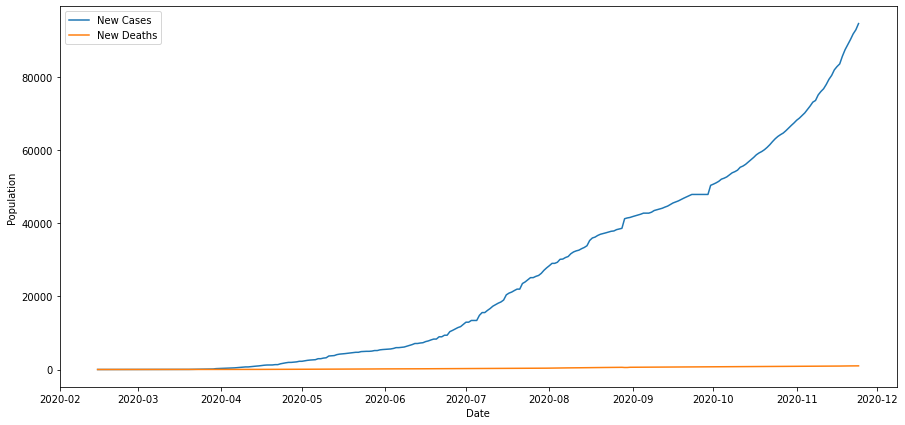

In [ ]:
plt.figure(figsize=(15,7))
plt.plot(tarrant_covid["New_Cases"],label="New Cases")
plt.plot(tarrant_covid["New_Death"],label = "New Deaths")
plt.xlabel('Date')
plt.ylabel('Population')
plt.legend()
plt.show()

In [ ]:
#Trying to select range of date to plot, works!
#tarrant_covid.loc["2020-10":"2020-12","New_Cases"].plot()

We create new columns for difference in new cases and new deaths since previous day.

In [ ]:
tarrant_covid['New_Case_yesterday'] =tarrant_covid["New_Cases"].shift(+1)
tarrant_covid['New_Death_yesterday'] =tarrant_covid["New_Death"].shift(+1)
tarrant_covid['New_Case_Diff_yesterday'] =tarrant_covid['New_Cases']- tarrant_covid["New_Cases"].shift(+1)
tarrant_covid['New_Death_Diff_yesterday'] =tarrant_covid['New_Death']- tarrant_covid["New_Death"].shift(+1)
tarrant_covid=tarrant_covid.dropna()
tarrant_covid

,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline,New_Cases,New_Death,New_Case_yesterday,New_Death_yesterday,New_Case_Diff_yesterday,New_Death_Diff_yesterday
date,,,,,,,,,,,,
2020-02-16,10.0,3.0,48.0,-3.0,1.0,-1.0,0,0,0.0,0.0,0.0,0.0
2020-02-17,8.0,2.0,50.0,2.0,-18.0,4.0,0,0,0.0,0.0,0.0,0.0
2020-02-18,-3.0,-2.0,-6.0,13.0,1.0,1.0,0,0,0.0,0.0,0.0,0.0
2020-02-19,-2.0,-1.0,-9.0,6.0,3.0,1.0,0,0,0.0,0.0,0.0,0.0
2020-02-20,2.0,1.0,4.0,1.0,1.0,0.0,0,0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2020-11-20,-16.0,-5.0,3.0,-34.0,-30.0,9.0,88948,978,87536.0,968.0,1412.0,10.0
2020-11-21,-21.0,-5.0,8.0,-25.0,-11.0,5.0,90316,982,88948.0,978.0,1368.0,4.0
2020-11-22,-17.0,-8.0,-33.0,-35.0,-12.0,5.0,91853,986,90316.0,982.0,1537.0,4.0


# Model Creation

In [ ]:
X_train = tarrant_covid[['New_Case_yesterday',"New_Case_Diff_yesterday"]]
y_train = tarrant_covid['New_Cases']
# X_test = tarrant_covid['2020-11':].drop(['New_Cases',"New_Death",'New_Death_Diff_yesterday'], axis = 1)
# y_test = tarrant_covid.loc['2020-11':, 'New_Cases']
# y_test
X_train

,New_Case_yesterday,New_Case_Diff_yesterday
date,,
2020-02-16,0.0,0.0
2020-02-17,0.0,0.0
2020-02-18,0.0,0.0
2020-02-19,0.0,0.0
2020-02-20,0.0,0.0
...,...,...
2020-11-20,87536.0,1412.0
2020-11-21,88948.0,1368.0
2020-11-22,90316.0,1537.0


## Importing various necessary sklearn regression modules

In [ ]:
from sklearn.model_selection import TimeSeriesSplit
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.model_selection import cross_val_score

LR: 1.000000 (0.000000)
NN: 0.999998 (0.000003)
KNN: -2.699662 (0.986495)
RF: -2.594725 (1.023058)
SVR: -27.973809 (30.578878)


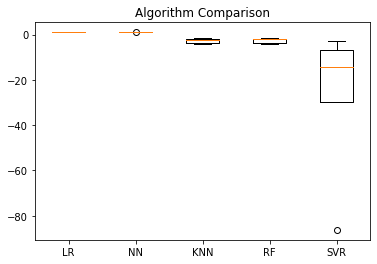

In [ ]:
models = []
models.append(('LR', LinearRegression()))
models.append(('NN', MLPRegressor(solver = 'lbfgs',max_iter=5000)))  #neural network
models.append(('KNN', KNeighborsRegressor())) 
models.append(('RF', RandomForestRegressor(n_estimators = 10))) # Ensemble method - collection of many decision trees
models.append(('SVR', SVR(gamma='auto'))) # kernel = linear
# Evaluate each model in turn
results = []
names = []
for name, model in models:
    # TimeSeries Cross validation
 tscv = TimeSeriesSplit(n_splits=5)
    
 cv_results = cross_val_score(model, X_train, y_train, cv=tscv, scoring='r2')
 results.append(cv_results)
 names.append(name)
 print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))
    
# Compare Algorithms
plt.boxplot(results, labels=names)
plt.title('Algorithm Comparison')
plt.show()